In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
current_path = '/content/drive/My Drive/Colab Notebooks/Project_GANder/gankook_cuda/semantic-segmentation-pytorch/'

import os

os.chdir(current_path)
!ls

 ade20k-resnet50dilated-ppm_deepsup
 batch_tensor
 Building_images
 ckpt
'Color Synthetic All_Color.ipynb'
'Color Synthetic All_Color_Shift.ipynb'
'Color Synthetic aws.ipynb'
'Color Synthetic.ipynb'
'Color Synthetic Randomic.ipynb'
 config
 cooperative_scene_parsing
 data
 decoder_tensor_image.png
 demo_test.sh
 download_ADE20K.sh
 DrivingLaneDetection
 DuLa-Net
 edge_tensor_image.png
 encoder_tensor_image.png
 eval_multipro.py
 eval.py
 extractRect.py
 info.json
 isolate
'Layout Estimation by vanishing line Func.ipynb'
'Layout Estimation Func Final.ipynb'
'Layout Estimation Func Final without AI.ipynb의 원본'
'Layout Estimation Func Final without AI.ipynb의 최신.ipynb'
'Layout Estimation Func.ipynb'
 layout_estimation_func.py
'Layout Estimation.ipynb'
'Layout Estimation without AI.ipynb'
'Layout Estimation without AI kmeans.ipynb'
 LICENSE
 Logo
 lsun
 lsun-room
 lsun-room-dsc
 mask_data
 mask_layout_data
 mit_semseg
 pretrained
 previous_test_data
 previous_test_result
 problem_te

In [3]:
!sudo pip install yacs

In [ ]:
# !chmod +x demo_test.sh
# !./demo_test.sh

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !nvidia-smi

In [ ]:
# !git clone https://github.com/thomasjpfan/pytorch_refinenet.git
# !pip install tensorboardX
# !tensorboard --logdir runs

In [ ]:
# from scipy.io import loadmat, savemat

# colors_ = loadmat('data/color150.mat')['colors']
# colors = loadmat('data/wall150.mat')['colors']
# print(type(colors_[0][0]))
# print(type(colors[0][0]))

In [ ]:
# import pandas as pd
# import numpy as np

# colors_csv = pd.read_csv('data/color_coding_semantic_segmentation_classes.csv', index_col=0)
# colors_csv = colors_csv['Color_Code (R,G,B)'] 

# for i in range(len(colors_csv)):
#   if i == 0:
#     colors_csv.iloc[i] = [255, 255, 255] #.astype('uint8')
#   else:
#     colors_csv.iloc[i] = [0, 0, 0] #.astype('uint8')

# colors_csv = np.array(colors_csv.tolist()).astype('uint8')
# print(colors_csv)

# savemat('data/wall150.mat', mdict={'colors': colors_csv})

### ***Input Image Preprocessing***

image.size : (2048, 1536)


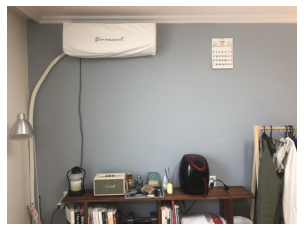

image.size : (2048, 1536)


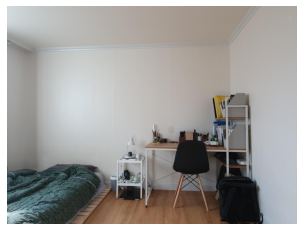

image.size : (2048, 1152)


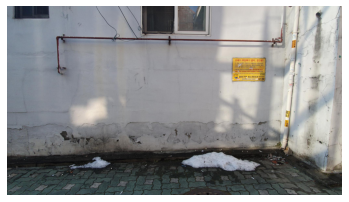

test_data/resized_KakaoTalk_20210118_155241305.jpg saved
image.size : (2048, 1536)


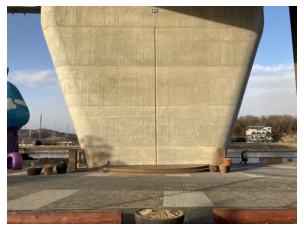

test_data/resized_KakaoTalk_20210118_155632208.jpg saved
image.size : (2048, 1536)


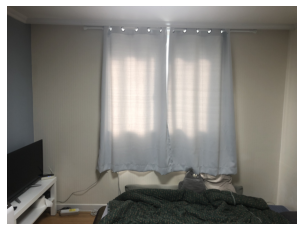

In [10]:
import cv2
import osqp
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_dir = 'test_data/'
# image_dir = 'isolate/'
max_width = 2048

for file_ in os.listdir(image_dir):
  image = Image.open(image_dir + file_)
  # image = cv2.imread(file_)
  # image = np.array(image)
  # print('image.size :', image.size)

  #     Image Resize    #
  if image.size[0] > max_width:
    resize_factor = max_width / image.size[0]
    image = image.resize((int(image.size[0] * resize_factor), int(image.size[1] * resize_factor)))

    image.save(image_dir + 'resized_' + file_)
    print(image_dir + 'resized_' + file_, 'saved')

  plt.imshow(image)
  plt.axis('off')
  print('image.size :', image.size)
  plt.show()



### ***Test Model***

In [11]:
!python3 -u test.py --imgs test_data/ --gpu 0 --cfg config/ade20k-hrnetv2.yaml \
TEST.result test_result/wall/ \
TEST.checkpoint epoch_0_56.pth \
MODEL.object_index 0
#  Object Index :  Wall : 0 /  Floor : 3 / Ceil : 5   #


[2021-01-18 07:10:51,644 INFO test.py line 234 556] Loaded configuration file config/ade20k-hrnetv2.yaml
[2021-01-18 07:10:51,645 INFO test.py line 235 556] Running with config:
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 32
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 4
DIR: ckpt/ade20k-hrnetv2-c1
MODEL:
  arch_decoder: c1
  arch_encoder: hrnetv2
  fc_dim: 720
  object_index: 0
  weights_decoder: 
  weights_encoder: 
  weights_unet: 
TEST:
  batch_size: 1
  checkpoint: epoch_0_56.pth
  result: test_result/wall/
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  fix_bn: False
  load_unet: True
  lr_decoder: 0.02
  lr_encoder: 0.02
  lr_pow: 0.9
  lr_unet: 0.02
  num_epoch: 30
  optim: SGD
  seed: 304
  start_epoch: 0
  weight_decay: 0.0001
  workers: 16
VAL:
  batch_size: 1
  checkp

### Video to Image

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

video_path = 'video_data/'
videos = os.listdir(video_path)
video_out = True
videos = ['4.mp4']
# videos = ['6.mp4']
print(videos)
# break

for video in videos:

  #     Video Info    #
  cap = cv2.VideoCapture(video_path + video)
  total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
  print('total_frames :', total_frames)

  save_path = video_path + video.replace('.mp4', '/')
  try:
    os.mkdir(save_path)
  
  except Exception as e:
    pass


  #     if you want to make video, use this code      #
  out_list = list()
  prev_frame = 0
  while(cap.isOpened()):

      try:
        ret, frame = cap.read()
        # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # cv2.imshow('frame',frame)
        # cv2_imshow(frame)
        # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        current_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
        print(current_frame)
        if prev_frame == current_frame:
          break

        if video_out:
          position = (int(frame.shape[1] / 2), int(frame.shape[0] / 2))
          cv2.putText(
          frame, #numpy array on which text is written
          "%s" % current_frame, #text
          position, #position at which writing has to start
          cv2.FONT_HERSHEY_SIMPLEX, #font family
          1, #font size
          (209, 80, 0, 255), #font color
          3) 
            
          out_list.append(frame)
          size = (frame.shape[1], frame.shape[0])

        # out.write(frame)
        
        # plt.imshow(frame)
        # plt.show()
        # plt.close()

        cv2.imwrite(save_path + '%s.jpg' % current_frame, frame)

        if current_frame >= total_frames:
          prev_frame = current_frame
          break
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break

      except Exception as e:
        print(e)
        break

if video_out:
  out = cv2.VideoWriter(video_path + 'frame_video.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
  for i in range(len(out_list)):
    out.write(out_list[i])
  out.release()
# cap.release()
# cv2.destroyAllWindows()
# break

['4.mp4']
total_frames : 461.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0


KeyboardInterrupt: ignored

In [ ]:
!pip install -U kora
from kora.drive import upload_public
video = videos[0]
url = upload_public(video_path + video)
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.5.5)


KeyboardInterrupt: ignored